In [1]:
import importlib.util
spec = importlib.util.spec_from_file_location("BoundaryLayerToolbox", "/Users/claudiopierard/vc/BoundaryLayerToolbox.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy as spy
import scipy.io as sio
import scipy.optimize as optimization
import scipy.interpolate as interpolate
from netCDF4 import Dataset
import h5py
from IPython import display
from matplotlib import animation
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
#%matplotlib inline

In [3]:
xlat = np.loadtxt('/Users/claudiopierard/VC/datos/xlat_d02_interpolado.txt')
xlong = np.loadtxt('/Users/claudiopierard/VC/datos/xlong_d02_interpolado.txt')

In [4]:
PED = (-99.204136, 19.325146)
CCA = (-99.1761, 19.3262)

In [5]:
ped_ix = blt.near_coord_loc(xlong, xlat, PED[0], PED[1])
cca_ix = blt.near_coord_loc(xlong, xlat, CCA[0], CCA[1])

In [6]:
file = h5py.File('/Volumes/BUFFALO_SOLDIER/datos_VC/05/may_24.h5', 'r')
vc_24 = file.get('vc_24h')

In [7]:
vc_24 = np.array(vc_24)

In [8]:
delegaciones_path = "/Users/claudiopierard/VC/datos/delegaciones_cdmx/"
estados_path = "/Users/claudiopierard/VC/datos/EstadosMX/"

In [9]:
delegaciones_names = blt.nombres_delegaciones #extrae un lista con las delegaciones guardada en el módulo blt.
estados_names = blt.nombres_estados

In [10]:
delegaciones = {}
for i in delegaciones_names:
    reg = blt.region()
    path = delegaciones_path + i + ".xy"
    blt.read_region(reg, path)
    delegaciones[i] = reg
    

In [11]:
estados = {}
for i in estados_names:
    reg = blt.region()
    path = estados_path + i + ".xy"
    blt.read_region(reg, path)
    estados[i] = reg

In [12]:
vc_24[:, :, 50:75, 15:50].max()

13158

In [13]:
plt.close('all')

In [22]:
'%03d'%100

'100'

In [21]:
print('%03d'%100)

100


In [43]:
i = 1
for d in range(6, 14):
    for h in range(0,24):
        fig = plt.figure(figsize=(7,6))
        ax = fig.add_subplot(111)
        ax.set_xlim(xlong[50:75,0].min(), xlong[50:75,0].max())
        ax.set_ylim(xlat[0,15:50].min(), xlat[0,15:50].max())
        #plt.rcParams.update({'font.size': 11})

        im = ax.pcolormesh(xlong[50:75, 15:50], xlat[50:75, 15:50], vc_24[d, h,50:75, 15:50], norm= colors.Normalize(vmin=1,vmax=13158))

        for name in estados_names:
            ax.plot(estados[name].lon, estados[name].lat, c='k', alpha = 0.5)

        for name in delegaciones_names:
            ax.plot(delegaciones[name].lon, delegaciones[name].lat, c='k', alpha = 0.5)

        ax.scatter(xlong[cca_ix[0],cca_ix[1]], xlat[cca_ix[0],cca_ix[1]], c = 'r')
        ax.scatter(xlong[ped_ix[0],ped_ix[1]], xlat[ped_ix[0],ped_ix[1]], c = 'cyan')
    
        fig.subplots_adjust(right=0.83)
        cbar_ax = fig.add_axes([0.85, 0.13, 0.03, 0.76])
        cbar = fig.colorbar(im, cax=cbar_ax)
        cbar.set_label('VC $(m^2/s)$', rotation=270)

        ax.set_xlabel('Longitud', fontsize=13)
        ax.set_ylabel('Latitud', fontsize=13)
        ax.set_title(str(d) + ' mayo ' +str(h)+':00', fontsize=13)
        h = '%03d'%i
        #print(type(h))
        plt.savefig('/Users/claudiopierard/VC/animaciones/mayo_6-12_2015/may'+ h)
        i += 1
        plt.close(fig)

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

# junio

In [44]:
file = h5py.File('/Volumes/BUFFALO_SOLDIER/datos_VC/06/jun_24.h5', 'r')
vc_24 = file.get('vc_24h')
vc_24 = np.array(vc_24)

In [50]:
i = 121
for d in range(12, 13):
    for h in range(0,24):
        fig = plt.figure(figsize=(7,6))
        ax = fig.add_subplot(111)
        ax.set_xlim(xlong[50:75,0].min(), xlong[50:75,0].max())
        ax.set_ylim(xlat[0,15:50].min(), xlat[0,15:50].max())
        #plt.rcParams.update({'font.size': 11})

        im = ax.pcolormesh(xlong[50:75, 15:50], xlat[50:75, 15:50], vc_24[d, h,50:75, 15:50], norm= colors.Normalize(vmin=1,vmax=13955))

        for name in estados_names:
            ax.plot(estados[name].lon, estados[name].lat, c='k', alpha = 0.5)

        for name in delegaciones_names:
            ax.plot(delegaciones[name].lon, delegaciones[name].lat, c='k', alpha = 0.5)

        ax.scatter(xlong[cca_ix[0],cca_ix[1]], xlat[cca_ix[0],cca_ix[1]], c = 'r')
        ax.scatter(xlong[ped_ix[0],ped_ix[1]], xlat[ped_ix[0],ped_ix[1]], c = 'cyan')
    
        fig.subplots_adjust(right=0.83)
        cbar_ax = fig.add_axes([0.85, 0.13, 0.03, 0.76])
        cbar = fig.colorbar(im, cax=cbar_ax)
        cbar.set_label('VC $(m^2/s)$', rotation=270)
        cbar.set_label_coords(-0.05,0.5)

        ax.set_xlabel('Longitud', fontsize=13)
        ax.set_ylabel('Latitud', fontsize=13)
        ax.set_title(str(d+1) + ' junio ' +str(h)+':00', fontsize=13)
        h = '%03d'%i
        plt.savefig('/Users/claudiopierard/VC/animaciones/jun_7-13_2015/june'+h)
        i += 1
        plt.close(fig)

AttributeError: 'Colorbar' object has no attribute 'set_label_coords'

# Marzo

In [48]:
file = h5py.File('/Volumes/BUFFALO_SOLDIER/datos_VC/03/mar_24.h5', 'r')
vc_24 = file.get('vc_24h')
vc_24 = np.array(vc_24)

In [68]:
i = 1
for d in range(6, 14):
    for h in range(0,24):
        fig = plt.figure(figsize=(7,6))
        ax = fig.add_subplot(111)
        ax.set_xlim(xlong[50:75,0].min(), xlong[50:75,0].max())
        ax.set_ylim(xlat[0,15:50].min(), xlat[0,15:50].max())
        #plt.rcParams.update({'font.size': 11})

        im = ax.pcolormesh(xlong[50:75, 15:50], xlat[50:75, 15:50], vc_24[d, h,50:75, 15:50], norm= colors.Normalize(vmin=1,vmax=28756))

        for name in estados_names:
            ax.plot(estados[name].lon, estados[name].lat, c='k', alpha = 0.5)

        for name in delegaciones_names:
            ax.plot(delegaciones[name].lon, delegaciones[name].lat, c='k', alpha = 0.5)

        ax.scatter(xlong[cca_ix[0],cca_ix[1]], xlat[cca_ix[0],cca_ix[1]], c = 'r')
        ax.scatter(xlong[ped_ix[0],ped_ix[1]], xlat[ped_ix[0],ped_ix[1]], c = 'cyan')
    
        fig.subplots_adjust(right=0.83)
        cbar_ax = fig.add_axes([0.85, 0.13, 0.03, 0.76])
        cbar = fig.colorbar(im, cax=cbar_ax)
        #cbar.set_label('VC $(m^2/s)$', rotation=270)

        ax.set_xlabel('Longitud', fontsize=13)
        ax.set_ylabel('Latitud', fontsize=13)
        ax.set_title(str(d) + ' marzo ' +str(h)+':00', fontsize=13)
        h = '%03d'%i
        plt.savefig('/Users/claudiopierard/VC/animaciones/mar_6-12_2015/mar'+h)
        i += 1
        plt.close(fig)

____________

In [ ]:
kaka

In [21]:
def animar(xm, ym, S, t):
    fig, axis = plt.subplots(figsize=(7,6))
    p = axis.pcolormesh(xm, ym, S[0,:,:], norm= colors.Normalize(vmin=0,vmax=S.max())) 
    axis.set_xlim(xlong[:,0].min(), xlong[:,0].max())
    axis.set_ylim(xlat[0,:].min(), xlat[0,:].max())
     
    #cbar_ax = fig.add_axes([.91, 0.13, 0.03, 0.76])
    cbar = fig.colorbar(p)

    for name in estados_names:
        axis.plot(estados[name].lon, estados[name].lat, c='black', alpha = 0.5)
            
    for name in delegaciones_names:
        ax.plot(delegaciones[name].lon, delegaciones[name].lat, c='k', alpha = 0.5)
            
    tx = axis.set_title(str(t[0]))

    def init():
        print('update init')
        p.set_array(np.ravel(S[0,:-1,:-1]))
        for name in estados_names:
            axis.plot(estados[name].lon, estados[name].lat, c='black', alpha = 0.5)
            
        for name in delegaciones_names:
            ax.plot(delegaciones[name].lon, delegaciones[name].lat, c='k', alpha = 0.5)
        tx.set_text('VC. Local hour ' + str(t[0]))
        return p

    def update(frame):
        #vmin = np.min(S[frame])
        #vmax = np.max(S[frame])

        time_str = str(t[frame])
        p.set_array(np.ravel(S[frame, :-1, :-1]))
        for name in estados_names:
            axis.plot(estados[name].lon, estados[name].lat, c='black', alpha = 0.5)
            
        for name in delegaciones_names:
            ax.plot(delegaciones[name].lon, delegaciones[name].lat, c='k', alpha = 0.5)
        
        #p.set_clim(vmin, vmax)
        #plt.title(str(t[frame]))
        axis.set_xlabel('Longitude', fontsize = 18)
        axis.set_ylabel('Latitude', fontsize = 18)
        #tx.set_text('t = ' + str(t[frame]))
        tx.set_text('VC. Local hour ' + time_str )
        #plt.title('Temperatura')

        return p

    anim = animation.FuncAnimation(fig, update, frames= [i for i in range(1,len(S))],  blit = False)
    #plt.show()
    return anim

In [22]:
pblh_24.shape

(29, 24, 102, 128)

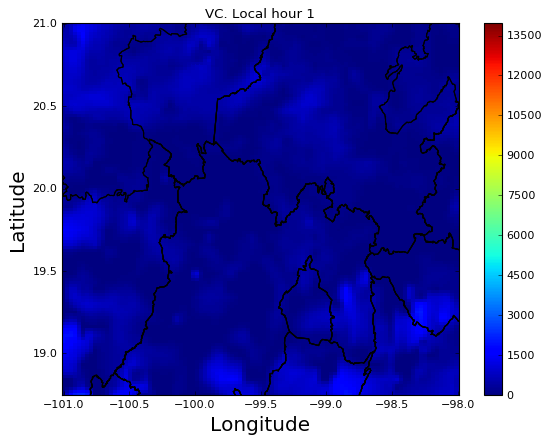

In [31]:
anima_T = animar(xlong, xlat, vc_24[7,:,:,:], range(0,24))

In [32]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5,  bitrate=1000)
anima_T.save('vc_df.mp4',writer=writer)